In [1]:
nptf_old_dir='/tigress/smsharma/Fermi-NPTF-exposure/'
work_dir = '/tigress/smsharma/Fermi-SmoothGalHalo/'
psf_dir='/tigress/smsharma/public/CTBCORE/psf_data/'
maps_dir='/tigress/smsharma/public/CTBCORE/'
fermi_data_dir='/tigress/smsharma/public/FermiData/'

In [2]:
import sys
import numpy as np
import healpy as hp
import pandas as pd

# Additional modules
sys.path.append(nptf_old_dir)
sys.path.append(work_dir + '/mkDMMaps')
import fermi.fermi_plugin as fp
sys.path.append('/tigress/somalwar/Fermi-NPTF-exposure/')
import mkDMMaps

%matplotlib inline

In [3]:
# Global settings
nside=128
eventclass=5 # 2 (Source) or 5 (UltracleanVeto)
eventtype=3 # 0 (all), 3 (bestpsf) or 5 (top3 quartiles)
diff = 'p6' # 'p6', 'p7', 'p8'
emin = 0
emax = 39

# Load the Fermi plugin
f_global = fp.fermi_plugin(maps_dir,fermi_data_dir=fermi_data_dir,work_dir=work_dir,CTB_en_min=emin,CTB_en_max=emax+1,nside=nside,eventclass=eventclass,eventtype=eventtype,newstyle=1,data_July16=True)

In [4]:
# These are the energy bin edges over which the data is defined
ebins = 2*np.logspace(-1,3,41)[emin:emax+2]

In [5]:
# Load necessary templates from the plugin

f_global.add_diffuse_newstyle(comp = diff,eventclass = eventclass, eventtype = eventtype) 
f_global.add_iso()  
# f_global.add_ps_model() # Don't load PS model from plugin -- add custom model
ps_temp = np.load('/tigress/somalwar/Subhaloes/Subhalos/ps_map.npy')
f_global.add_template_by_hand(comp='ps_model',template=ps_temp)
f_global.add_bubbles() 

In [6]:
for iebin in range(len(ebins)-1):
    fermi_data = f_global.CTB_count_maps[iebin].astype(np.int32)
    fermi_exposure = f_global.CTB_exposure_maps[iebin]

    dif = f_global.template_dict[diff][iebin]
    iso = f_global.template_dict['iso'][iebin]
    psc = f_global.template_dict['ps_model'][iebin]
    bub = f_global.template_dict['bubs'][iebin]
    
    np.save('maps/dif'+str(iebin), dif)
    np.save('maps/iso'+str(iebin), iso)
    np.save('maps/psc'+str(iebin), psc)
    np.save('maps/bub'+str(iebin), bub)
    np.save('maps/data'+str(iebin), fermi_data)
    np.save('maps/exposure'+str(iebin), fermi_exposure)

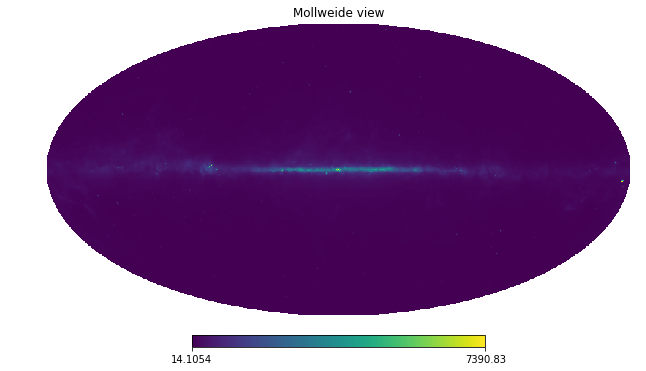

In [7]:
dif = np.zeros(len(dif))
for iebin in range(10, 20):
    dif += np.load("maps/iso"+str(iebin)+".npy")
    dif += np.load("maps/psc"+str(iebin)+".npy")
    dif += 14*np.load("maps/dif"+str(iebin)+".npy")
hp.mollview(dif)

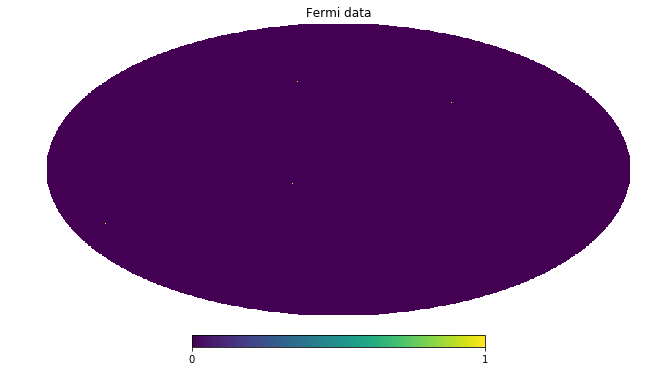

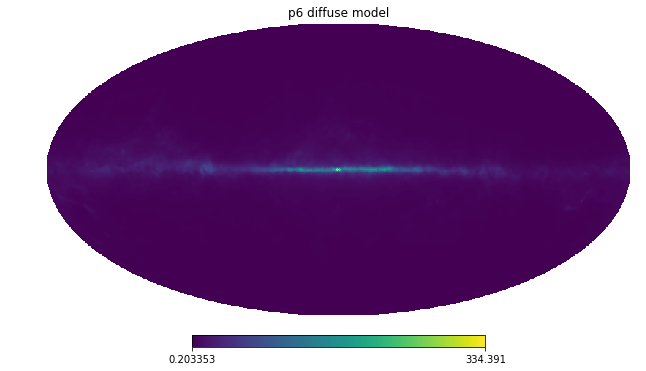

In [8]:
# View the data and one template in the chosen energy bin
 
hp.mollview(fermi_data, title="Fermi data")

hp.mollview(np.load("maps/dif7.npy"), title="p6 diffuse model")